In [6]:
import os
import cv2 as cv
import numpy as np
from random import randint
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [7]:
root_folder = os.path.abspath('..')
root_folder

'C:\\Users\\santo\\Digital-Image-Processing-2021.1'

In [8]:
def plot_imgs(img, img2, msg1, msg2):

    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)

    plt.imshow(img)
    plt.title(msg1)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)

    plt.imshow(img2)
    plt.title(msg2)
    plt.xticks([])
    plt.yticks([])

    plt.show()

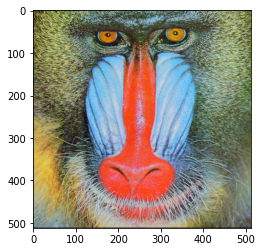

In [9]:
img_path = os.path.join(root_folder, "img", "baboon.png")

img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

### Crop and flip an image using Numpy array indexing.

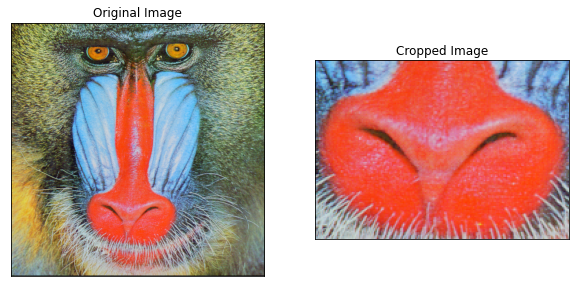

In [10]:
#coordinates to crop

x1_crop, x2_crop = 150, 335
y1_crop, y2_crop = 320, 450

crop_img = img.copy()[y1_crop:y2_crop, x1_crop:x2_crop]
plot_imgs(img.copy(), crop_img, "Original Image", "Cropped Image")

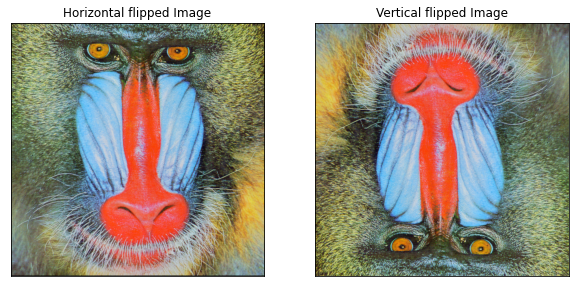

In [11]:
#using np.flip function

flipv_img = np.flip(img.copy(), axis=1)
fliph_img = np.flip(img.copy(), axis=0)

plot_imgs(flipv_img, fliph_img, "Horizontal flipped Image", "Vertical flipped Image")

### Implement image translation using Numpy and OpenCV.

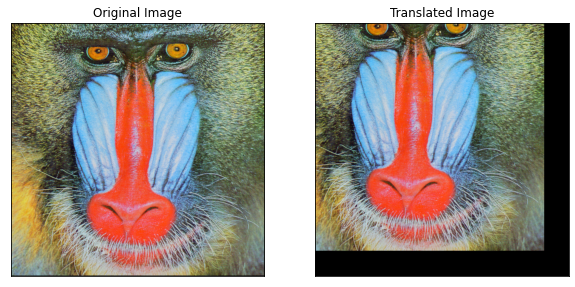

In [12]:
img2 = img.copy()

t_x, t_y = -50, -50

t_matrix = np.array([
                    [1, 0, t_x],
                    [0, 1, t_y]
]).astype("float")

img2_transl = cv.warpAffine(img2, t_matrix, (img2.shape[1], img2.shape[0]))

plot_imgs(img2, img2_transl, "Original Image", "Translated Image")

### Implement image rotation using Numpy and OpenCV.

In [13]:
img3 = img.copy()

In [14]:
theta = 60

#get center of original image

(h, w) = img3.shape[:2]
(cx, cy) = (w//2 , h//2)

scale = 1.0
#getRotationMatrix2D return a rotation matrix relative to center and theta values

rot_matrix = cv.getRotationMatrix2D((cx,cy), -theta, scale)

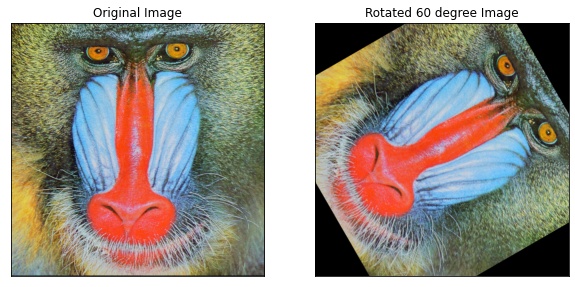

In [15]:
rot_img = cv.warpAffine(img3, rot_matrix, (img3.shape[1],img3.shape[0]))
plot_imgs(img3, rot_img, "Original Image", "Rotated 60 degree Image")

### Implement image resizing using OpenCV

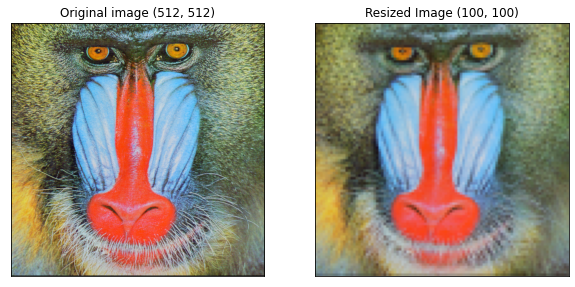

In [16]:
img4 = img.copy()

new_size = 100

#ratio is used to keeping the proportion of original image

ratio = float(new_size) / img4.shape[1]
new_dim = (new_size, int(ratio * img4.shape[0]))

#resize image using Area Interpolation method
resz_img = cv.resize(img, new_dim, interpolation = cv.INTER_AREA)
plot_imgs(img4, resz_img, f"Original image {img4.shape[:2]}", f"Resized Image {new_dim}")

### Implement bitwise operations: AND, OR, XOR.

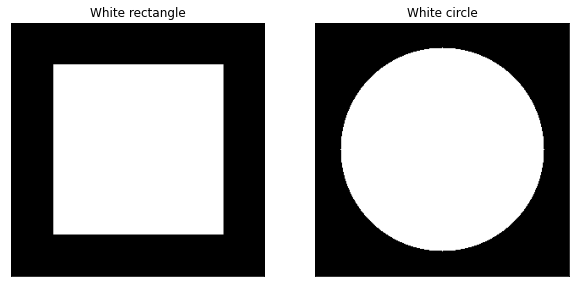

In [17]:
size = 300
size_cicle = 150
size_rect = 120

color = (255,255,255)

img5 = np. zeros ((size, size) , dtype = "uint8" )

#rectangle mask
white_rect = cv.rectangle(img5.copy(), (50, 50), (250,250), color, -1)
white_rect = cv.cvtColor(white_rect, cv.COLOR_BGR2RGB)

#circle mask
white_cicle = cv.circle(img5.copy(), (size_cicle,size_cicle), 120, color, -1)
white_cicle = cv.cvtColor(white_cicle, cv.COLOR_BGR2RGB)

plot_imgs(white_rect, white_cicle, "White rectangle", "White circle")

In [18]:
#use bitwise function of opencv

and_img = cv.bitwise_and(white_rect, white_cicle)
or_img = cv.bitwise_or(white_rect, white_cicle)
xor_img = cv.bitwise_xor(white_rect, white_cicle)
not_img = cv.bitwise_not(white_rect)

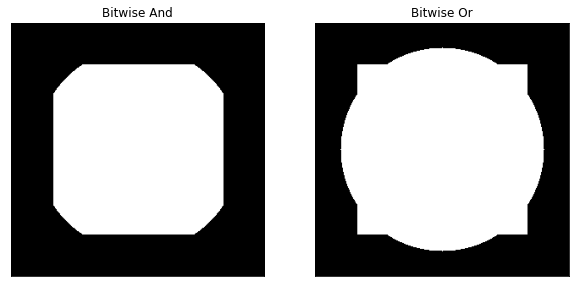

In [19]:
plot_imgs(and_img, or_img, "Bitwise And", "Bitwise Or")

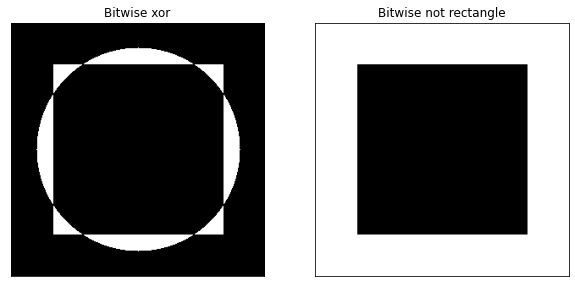

In [20]:
plot_imgs(xor_img, not_img, "Bitwise xor", "Bitwise not rectangle")

### Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

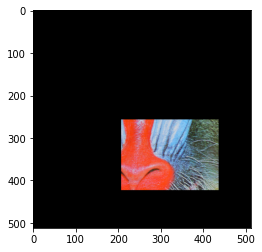

In [21]:
img6 = img.copy()

#randon points values to simule any shapes

x1, y1 = randint(0, 300), randint(0, 300)
x2, y2 = randint(x1+50, img6.shape[1]), randint(y1+50, img6.shape[0])

#mask with same shape of original image

mask = np.zeros(img6.shape[:2], dtype="uint8")
cv.rectangle(mask, (x1,y1), (x2,y2), color, -1)

#and using mask to get ROI
masked = cv.bitwise_and(img6, img6, mask=mask)

plt.imshow(masked)
plt.show()